In [8]:
#In this competition we want to predict whether a click is fraudulent or not and the metric used for evaluation is AUC because its
#a binary classification and data is unbalanced and the AUC score only depends on how well you can separate the two classes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
# Read in the data.
train = pd.read_csv("train.csv",nrows=15000000,parse_dates=['click_time', 'attributed_time'])

In [2]:
ntrain = train.shape[0]
#train.drop(['attributed_time'], axis=1, inplace=True)
train['day'] = train['click_time'].dt.day.astype('uint8')
train['hour'] = train['click_time'].dt.hour.astype('uint8')
train['minute'] = train['click_time'].dt.minute.astype('uint8')
train['second'] = train['click_time'].dt.second.astype('uint8')
train['click_h'] = train['click_time'].dt.hour + train['click_time'].dt.minute / 60
train['attributed_h'] = train['attributed_time'].dt.hour + train['attributed_time'].dt.minute / 60
#train.drop(['click_time'], axis=1, inplace=True)

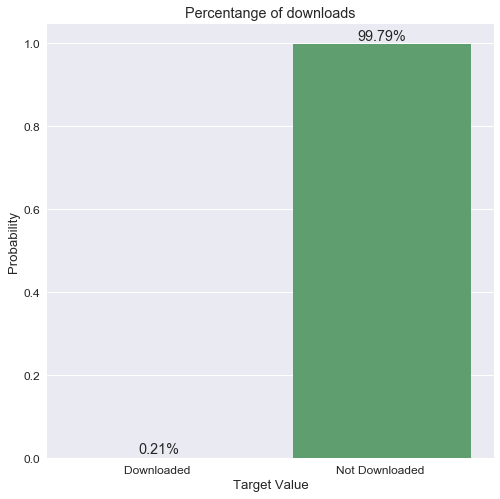

In [3]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
mean = (train.is_attributed.values == 1).mean()
ax = sns.barplot(['Downloaded ', 'Not Downloaded '], [mean, 1-mean])
ax.set(xlabel='Target Value', ylabel='Probability', title='Percentange of downloads')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center") 

#As we can see the data is very unbalanced and we will need a robust model for prediction

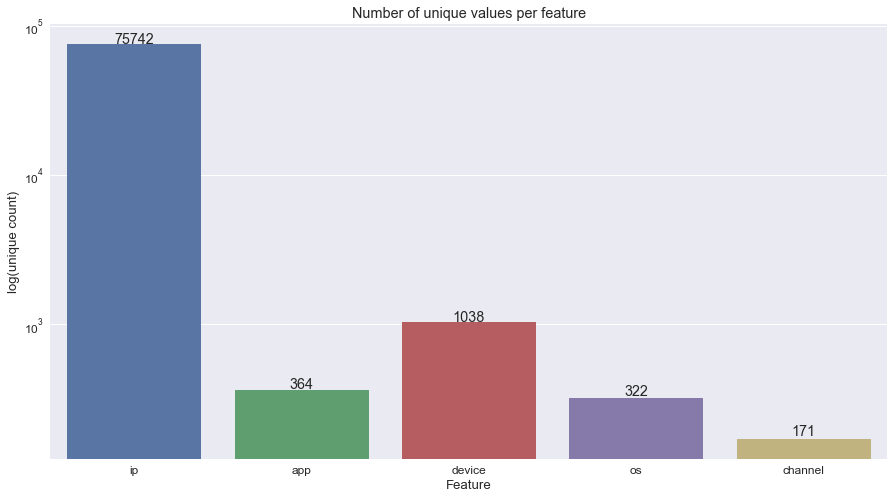

In [4]:
#Number of unique values per feature
plt.figure(figsize=(15, 8))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

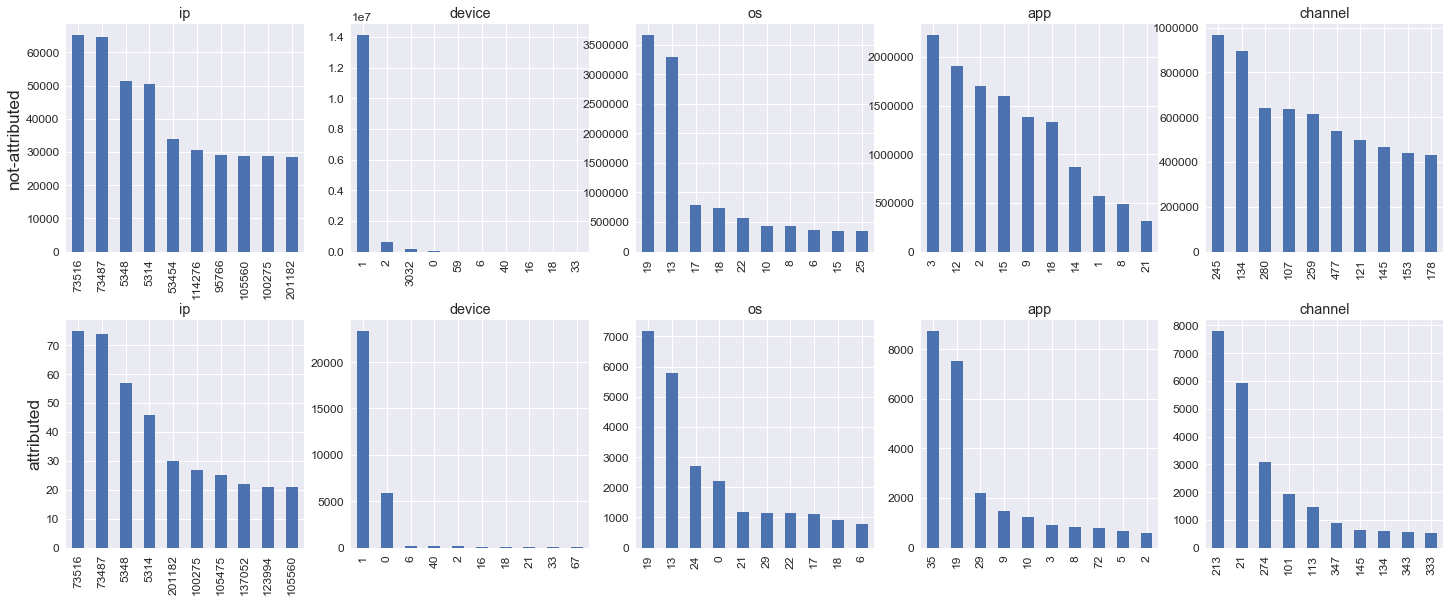

In [5]:
fig, axes = plt.subplots(2, 5)
fig.set_figheight(8)
fig.set_figwidth(20)
fig.tight_layout()
attributed = [0, 1]
attributes = ['ip', 'device', 'os', 'app', 'channel']
for attributed in attributed:
    for idx, attr in enumerate(attributes):
        values = train[train.is_attributed == attributed][attr].value_counts().head(10)
        ax = values.plot.bar(ax=axes[attributed][idx])
        ax.set_title(attr)
        if idx == 0:
            if attributed == 0:
                h = ax.set_ylabel('not-attributed', rotation='vertical', size='large')
            else:
                h= ax.set_ylabel('attributed', rotation='vertical', size='large')
plt.subplots_adjust(hspace=0.3)

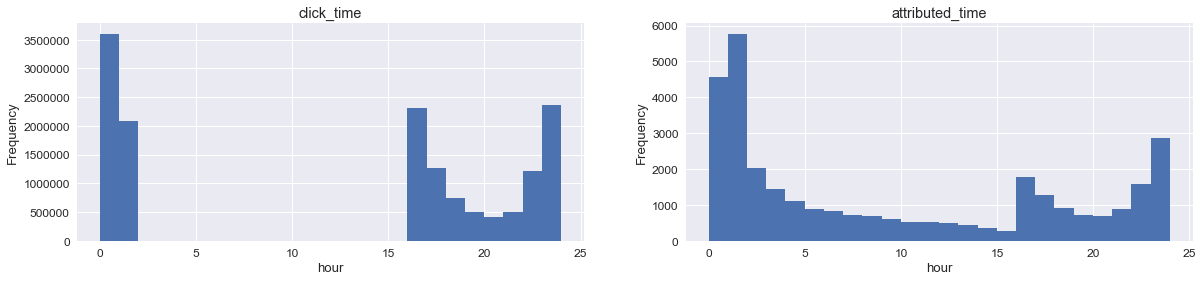

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
ax = train['click_h'].plot.hist(bins=24, ax=axes[0])
xl = ax.set_xlabel('hour')
title = ax.set_title('click_time')

ax = train['attributed_h'].plot.hist(bins=24, ax=axes[1])
xl = ax.set_xlabel('hour')
title = ax.set_title('attributed_time')

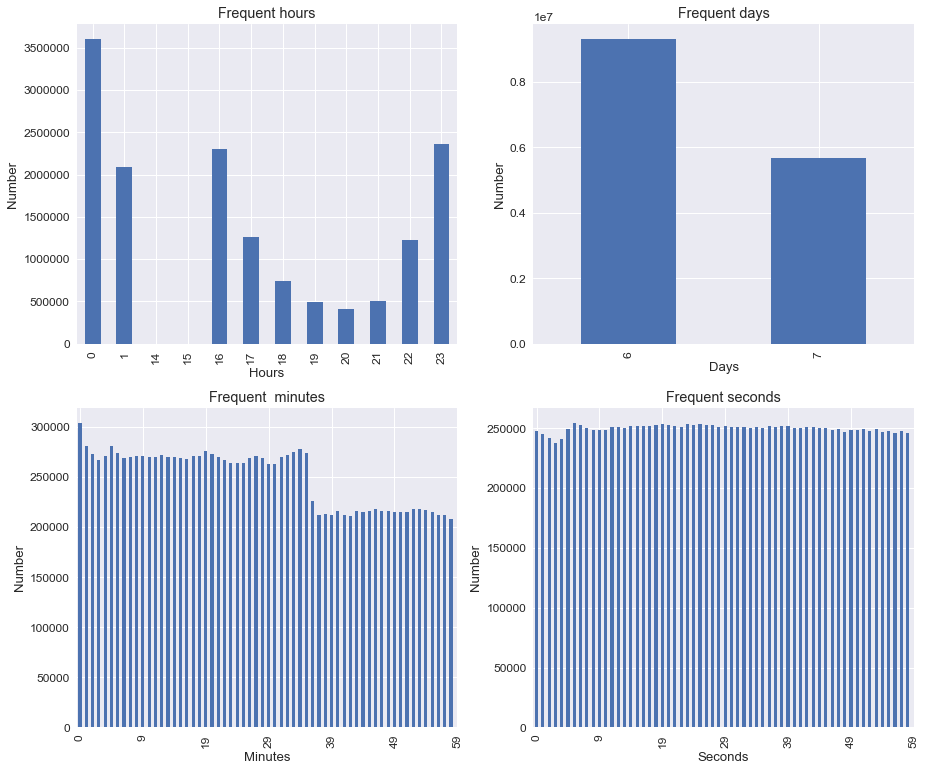

In [7]:
frequent_hour = train.hour.value_counts().sort_index()
frequent_day = train.day.value_counts().sort_index()
frequent_minute = train.minute.value_counts().sort_index()
frequent_second = train.second.value_counts().sort_index()

plt.figure(figsize=(15,20))

plt.subplot(321)
frequent_hour.plot(kind='bar')
plt.title("Frequent hours")
plt.xlabel("Hours")
plt.ylabel("Number")

plt.subplot(322)
frequent_day.plot(kind='bar')
plt.title("Frequent days")
plt.xlabel("Days")
plt.ylabel("Number")


plt.subplot(323)
frequent_minute.plot(kind='bar')
plt.xticks(np.arange(0, 69, step=10), (0,9,19,29,39,49,59))
plt.title("Frequent  minutes")
plt.xlabel("Minutes")
plt.ylabel("Number")

plt.subplot(324)
frequent_second.plot(kind='bar')
plt.xticks(np.arange(0, 69, step=10), (0,9,19,29,39,49,59))
plt.title("Frequent seconds")
plt.xlabel("Seconds")
plt.ylabel("Number")

del frequent_hour,frequent_day,frequent_minute,frequent_second